In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")
import lightgbm as lgbm


In [83]:
train_df = pd.read_csv('../Data/multi-label-classification-data/train_process.csv')
test_df = pd.read_csv('../Data/multi-label-classification-data/test.csv')
label_df = pd.read_csv('../Data/multi-label-classification-data/label.csv')
submission = pd.read_csv('../Data/multi-label-classification-data/sample_submission.csv')

In [84]:
train_df = train_df.drop(['id','FpDensityMorgan1', 'FpDensityMorgan2','FpDensityMorgan3'], axis=1)
test_df = test_df.drop(['id','FpDensityMorgan1', 'FpDensityMorgan2','FpDensityMorgan3'], axis=1)


In [85]:
# skew_feature = ['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
#        'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
#        'FpDensityMorgan2', 'FpDensityMorgan3',
#        'HeavyAtomMolWt', 'Kappa3', 
#        'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
#        'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
#        ]
skew_feature = [ 'Kappa3']

In [86]:
for col in skew_feature:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])


/home/bbok0525/anaconda3/envs/default/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [87]:
# 훈련 검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(train_df, label_df,test_size=0.3)

In [88]:
cols = label_df.columns

In [89]:
# 하이퍼 파라미터
params={"num_leaves":300,
       "max_bin":450,
       "feature_fraction":0.52,
       "bagging_fraction":0.52,
       "objective":"binary",
       "learning_rate":0.05,
       "boosting_type":"gbdt",
       "metric":"auc"
       }

In [90]:
# 학습

models = []
for  i in tqdm(range(y_train.shape[1])):
    
    train = lgbm.Dataset(x_train, y_train.iloc[:,i])
    test = lgbm.Dataset(x_test, y_test.iloc[:,i])
    model = lgbm.train(params=params, train_set=train, valid_sets=[train, test], num_boost_round=1000, early_stopping_rounds=10, verbose_eval=100)
    models.append(model)

 17%|█▋        | 1/6 [00:00<00:00,  5.19it/s]

[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 6950, number of negative: 3436
[LightGBM] [Info] Total Bins 8529
[LightGBM] [Info] Number of data: 10386, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669170 -> initscore=0.704434
[LightGBM] [Info] Start training from score 0.704434
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[14]	training's auc: 0.928936	valid_1's auc: 0.694555
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try 

 33%|███▎      | 2/6 [00:00<00:00,  6.14it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	training's auc: 0.97233	valid_1's auc: 0.568117
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 3254, number of negative: 7132
[LightGBM] [Info] Total Bins 8529
[LightGBM] [Info] Number of data: 10386, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313306 -> initscore=-0.784707
[LightGBM] [Info] Start training from score -0.784707
Training until validation scores don't improve for 10 rounds


 67%|██████▋   | 4/6 [00:00<00:00,  6.50it/s]

Early stopping, best iteration is:
[19]	training's auc: 0.957567	valid_1's auc: 0.633644
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 2920, number of negative: 7466
[LightGBM] [Info] Total Bins 8529
[LightGBM] [Info] Number of data: 10386, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281148 -> initscore=-0.938776
[LightGBM] [Info] Start training from score -0.938776
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	training's auc: 0.929755	valid_1's auc: 0.672674
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may

100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

Early stopping, best iteration is:
[23]	training's auc: 0.990693	valid_1's auc: 0.695258
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 1557, number of negative: 8829
[LightGBM] [Info] Total Bins 8529
[LightGBM] [Info] Number of data: 10386, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149913 -> initscore=-1.735281
[LightGBM] [Info] Start training from score -1.735281
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	training's auc: 0.97876	valid_1's auc: 0.565603


In [91]:
submission

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5
...,...,...,...
9888,24726,0.5,0.5
9889,24727,0.5,0.5
9890,24728,0.5,0.5
9891,24729,0.5,0.5


In [92]:
submission = submission[['id']]

ec1 = pd.DataFrame(models[0].predict(test_df), columns=['EC1'])
ec2 = pd.DataFrame(models[1].predict(test_df), columns=['EC2'])
submission = pd.concat([submission, ec1, ec2], axis=1)
# submission.to_csv('submit_03_5.csv', index=False)

[Text(0.5, 1.0, 'Feature Importance (gain)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

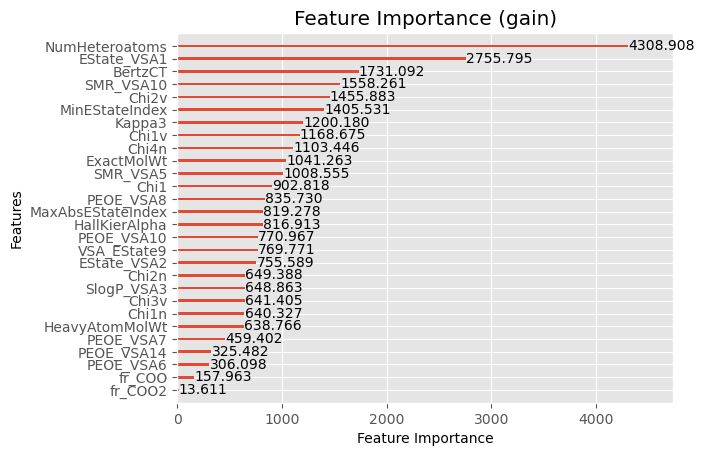

In [93]:
ax = lgbm.plot_importance(models[0], max_num_features=len(train_df.columns), importance_type='gain')
ax.set(title=f'Feature Importance (gain)',
	xlabel='Feature Importance',
	ylabel='Features')

[Text(0.5, 1.0, 'Feature Importance (split)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

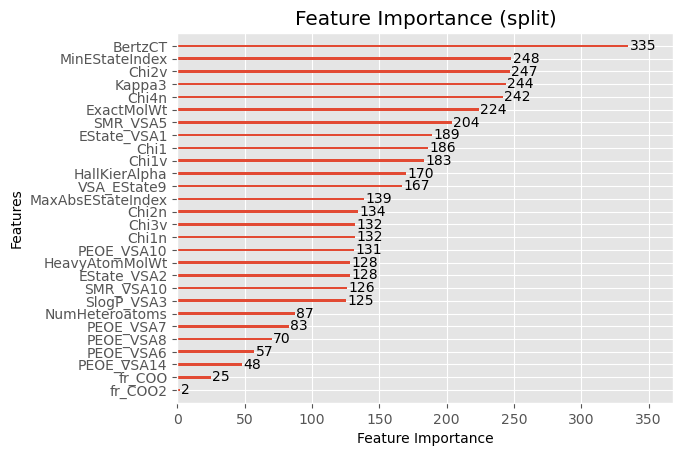

In [94]:
ax = lgbm.plot_importance(models[0], max_num_features=len(train_df.columns), importance_type='split')
ax.set(title=f'Feature Importance (split)',
	xlabel='Feature Importance',
	ylabel='Features')

[Text(0.5, 1.0, 'Feature Importance (gain)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

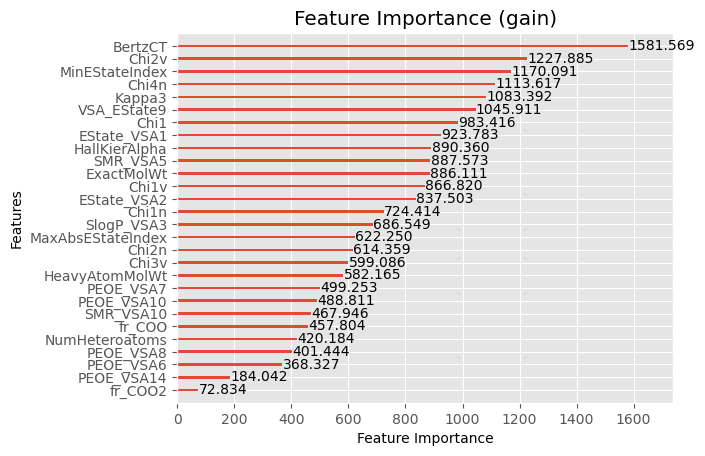

In [95]:
ax = lgbm.plot_importance(models[1], max_num_features=len(train_df.columns), importance_type='gain')
ax.set(title=f'Feature Importance (gain)',
	xlabel='Feature Importance',
	ylabel='Features')

[Text(0.5, 1.0, 'Feature Importance (split)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

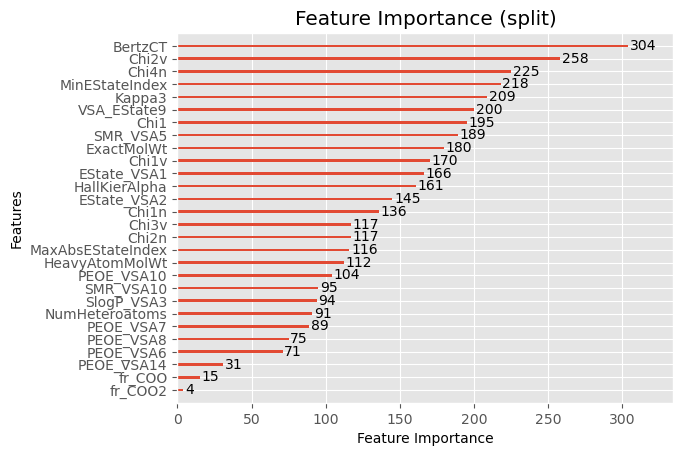

In [96]:
ax = lgbm.plot_importance(models[1], max_num_features=len(train_df.columns), importance_type='split')
ax.set(title=f'Feature Importance (split)',
	xlabel='Feature Importance',
	ylabel='Features')